In [1]:
import pandas as pd
import numpy as np

In [3]:
data=pd.read_csv(r"C:\Users\hp\OneDrive\Masaüstü\HR_data.csv")

In [7]:
df=data.copy()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Id                     14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  Age                    158 non-null    float64
 11  left                   14999 non-null  int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 1.4+ MB


In [9]:
df.describe()

,Id,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Age,left
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,158.000000,14999.000000
mean,7500.000000,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,34.018987,0.238083
std,4329.982679,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,10.068220,0.425924
min,1.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,19.000000,0.000000
25%,3750.500000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,24.000000,0.000000
50%,7500.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,35.000000,0.000000
75%,11249.500000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,45.000000,0.000000
max,14999.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,49.000000,1.000000


In [13]:
df=df.drop("Id",axis=1)

In [16]:
df.isnull().sum()

satisfaction_level           0
last_evaluation              0
number_project               0
average_montly_hours         0
time_spend_company           0
Work_accident                0
promotion_last_5years        0
Department                   0
salary                       0
Age                      14841
left                         0
dtype: int64

In [18]:
df.shape

(14999, 11)

In [21]:
df=df.drop("Age",axis=1)

In [34]:
df[df["Work_accident"]==0].shape

(12830, 10)

In [43]:
df[df["promotion_last_5years"]==1].shape

(319, 10)

In [45]:
df.duplicated().sum()

3008

In [47]:
df=df.drop_duplicates()

In [48]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary,left
0,0.38,0.53,2,157,3,0,0,sales,low,1
1,0.80,0.86,5,262,6,0,0,sales,medium,1
2,0.11,0.88,7,272,4,0,0,sales,medium,1
3,0.72,0.87,5,223,5,0,0,sales,low,1
4,0.37,0.52,2,159,3,0,0,sales,low,1
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,1,management,high,0
11996,0.74,0.95,5,266,10,0,1,management,high,0
11997,0.85,0.54,3,185,10,0,1,management,high,0
11998,0.33,0.65,3,172,10,0,1,marketing,high,0


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

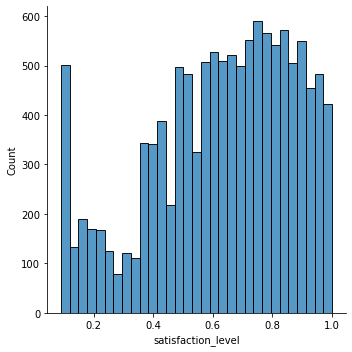

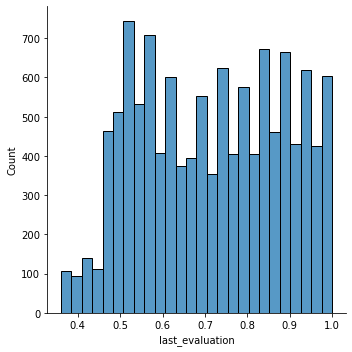

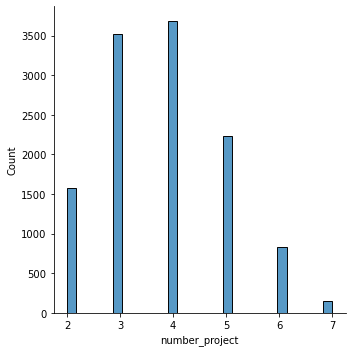

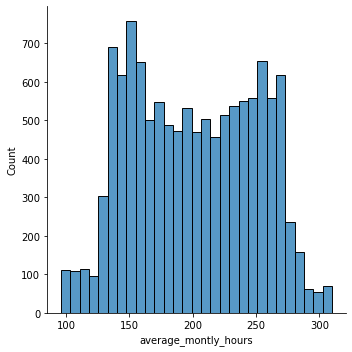

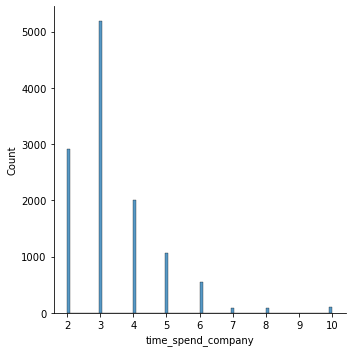

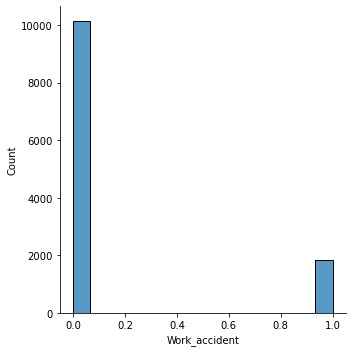

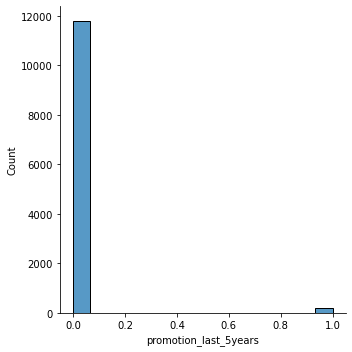

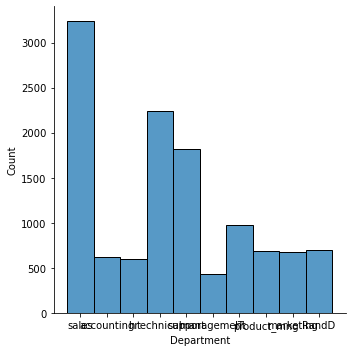

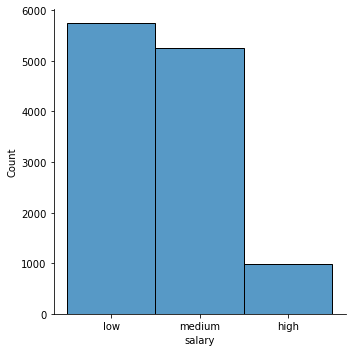

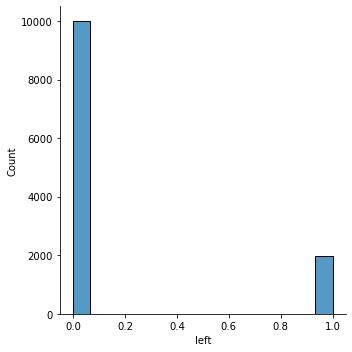

In [54]:
for col in df.columns:
    sns.displot(df[col])

<AxesSubplot:>

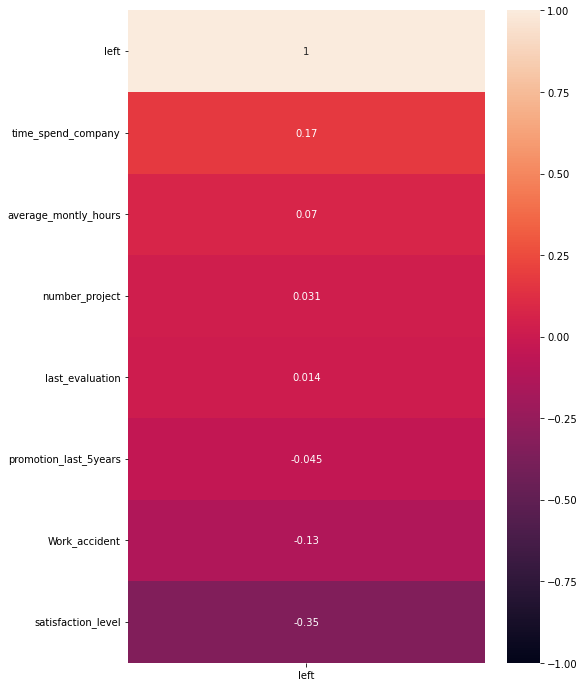

In [59]:
plt.figure(figsize=(8, 12))
sns.heatmap(df.corr()[["left"]].sort_values(by="left",ascending=False),vmin=-1,vmax=1,annot=True)

In [60]:
import missingno as msno

<AxesSubplot:>

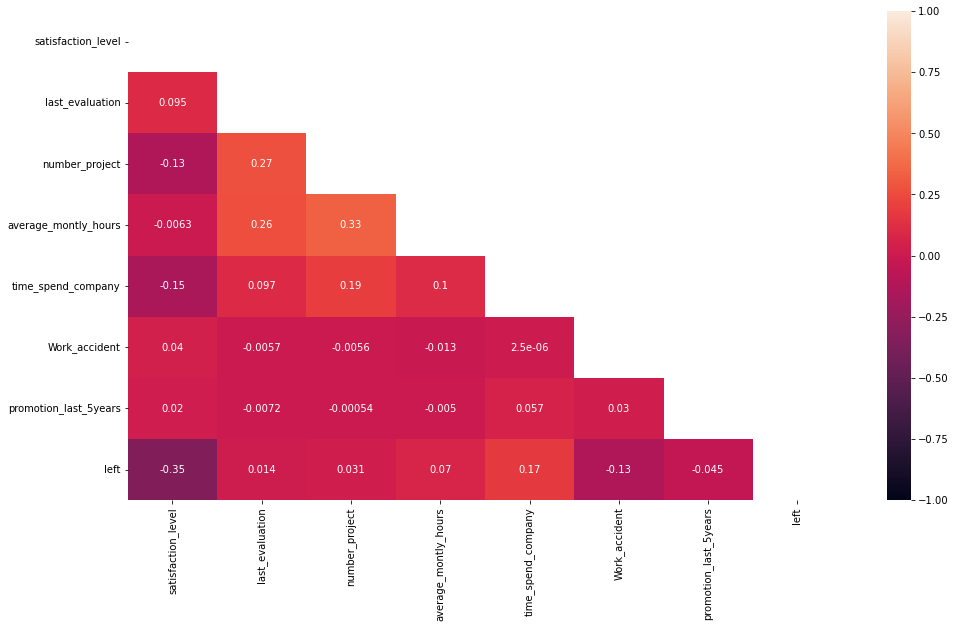

In [63]:
plt.figure(figsize=(16,9))
m=np.triu(np.ones_like(df.corr(),dtype=np.bool_))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1,mask=m)

In [65]:
pd.get_dummies(df[[""]])

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
11996,0.74,0.95,5,266,10,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
11997,0.85,0.54,3,185,10,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
11998,0.33,0.65,3,172,10,0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [71]:
A=pd.get_dummies(df[["Work_accident","promotion_last_5years","Department"]],drop_first=True)

In [74]:
df["salary"]

0           low
1        medium
2        medium
3           low
4           low
          ...  
11995      high
11996      high
11997      high
11998      high
11999       low
Name: salary, Length: 11991, dtype: object

In [76]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["salary"]=encoder.fit_transform(df["salary"])

C:\Users\hp\AppData\Local\Temp/ipykernel_15824/1200899122.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["salary"]=encoder.fit_transform(df["salary"])


In [78]:
df["salary"]

0        1
1        2
2        2
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    1
Name: salary, Length: 11991, dtype: int32

In [80]:
df=df.drop(df[["Work_accident","promotion_last_5years","Department"]],axis=1)

In [91]:
df1=pd.concat([A,df],axis=1)

In [86]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()

In [94]:
df1[df1.columns]=scaler.fit_transform(df1)

In [95]:
df1

,Work_accident,promotion_last_5years,Department_RandD,Department_accounting,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,salary,left
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.823529,-0.655172,-1.0,-0.500000,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.411765,0.482759,0.5,0.720930,3.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.617647,0.551724,1.5,0.837209,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.176471,0.517241,0.5,0.267442,2.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.852941,-0.689655,-1.0,-0.476744,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.705882,-0.586207,-0.5,0.686047,7.0,-1.0,0.0
11996,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.235294,0.793103,0.5,0.767442,7.0,-1.0,0.0
11997,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.558824,-0.620690,-0.5,-0.174419,7.0,-1.0,0.0
11998,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.970588,-0.241379,-0.5,-0.325581,7.0,-1.0,0.0


# Modelling

In [105]:
X=df1.drop("left",axis=1)
y=df["left"]

In [106]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.25,random_state=295)

In [109]:
from xgboost import XGBClassifier
xgb=XGBClassifier()

In [110]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [112]:
predicted=xgb.predict(X_test)

In [115]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [114]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2500
           1       0.97      0.92      0.95       498

    accuracy                           0.98      2998
   macro avg       0.98      0.96      0.97      2998
weighted avg       0.98      0.98      0.98      2998



In [116]:
confusion_matrix(y_test,predicted)

array([[2488,   12],
       [  39,  459]], dtype=int64)